# Stock Technical Analysis: Python Tutorial

Price Channels

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating Bollinger Bands.

In this post, we introduce a new technical indicator,  Price Channels.

Price Channels are lines set above and below the price of a security. The upper channel is set at the x-period high and the lower channel is set at the x-period low. For a 20-day Price Channel, the upper channel would equal the 20-day high and the lower channel would equal the 20-day low.

Price Channels can be used to identify upward thrusts that signal the start of an uptrend or downward plunges that signal the start of a downtrend. Price Channels can also be used to identify overbought or oversold levels within a bigger downtrend or uptrend.

Price Channels are calculated as follows:
    
        Upper Channel: 20-day high
        
        Lower Channel: 20-day low

Let’s use Python to compute Price Channels.

1.) Import modules.

In [1]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.) Define function for querying the daily high.

In [2]:
def get_high(stock, start, end): 
    return web.DataReader(stock,'google',start,end)['High']

3.) Define function for querying the daily low.

In [3]:
def get_low(stock, start, end): 
    return web.DataReader(stock,'google',start,end)['Low']

4.) Define function for querying daily close.

In [4]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

5.) Query daily high, daily low, and daily close for ‘FB’ during 2016.

In [6]:
df = pd.DataFrame(get_high('FB', '1/1/2016', '12/31/2016'))
df['Low'] = pd.DataFrame(get_low('FB', '1/1/2016', '12/31/2016'))
df['Close'] = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))

6.) Compute 4 week high and 4 week low using rolling max/min. Add 50 day simple moving average for good measure.

In [7]:
df['4WH'] = pd.rolling_max(df['High'], 20)
df['4WL'] = pd.rolling_min(df['Low'], 20)
df['50 sma'] = pd.rolling_mean(df['Close'], 50)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).max()
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).min()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  app.launch_new_instance()


7.) Plot 4WH, 4WL, 50 sma, and daily close.

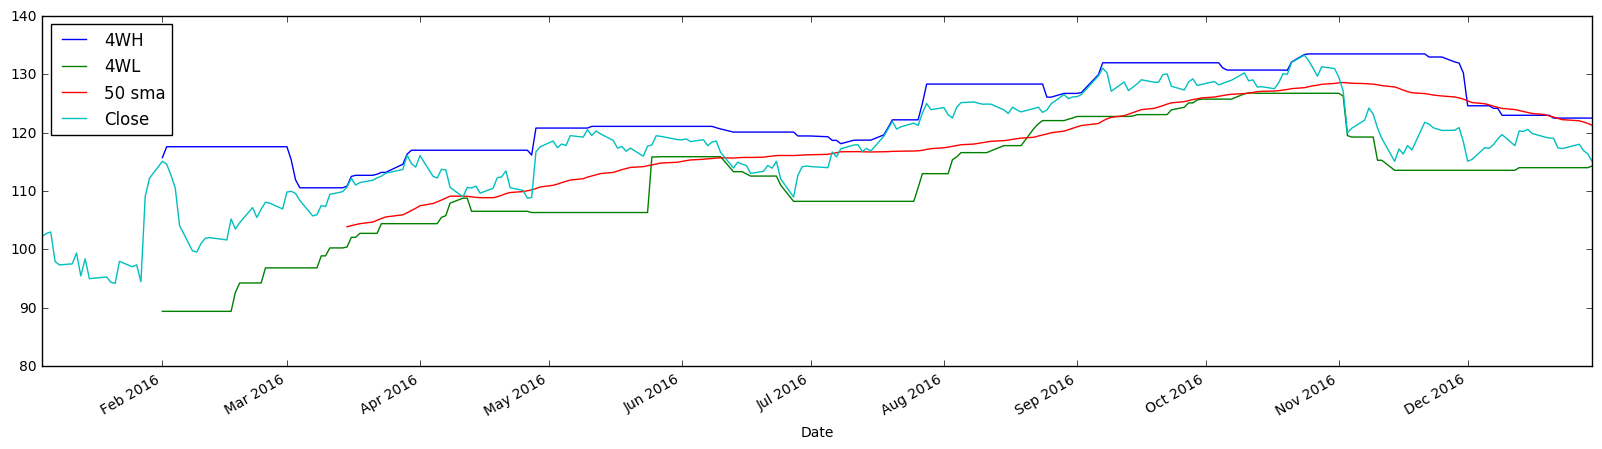

In [9]:
df.plot(y=['4WH', '4WL', '50 sma', 'Close'], figsize=(20,5))

There you have it! We created our Price Channels. Here’s the full code:

In [10]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_high(stock, start, end): 
    return web.DataReader(stock,'google',start,end)['High']

def get_low(stock, start, end): 
    return web.DataReader(stock,'google',start,end)['Low']

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
df = pd.DataFrame(get_high('FB', '1/1/2016', '12/31/2016'))
df['Low'] = pd.DataFrame(get_low('FB', '1/1/2016', '12/31/2016'))
df['Close'] = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['4WH'] = pd.rolling_max(df['High'], 20)
df['4WL'] = pd.rolling_min(df['Low'], 20)
df['50 sma'] = pd.rolling_mean(df['Close'], 50)
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).max()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).min()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


,High,Low,Close,4WH,4WL,50 sma
Date,,,,,,
2016-12-23,117.56,116.30,117.27,122.5,114.0,122.2336
2016-12-27,118.68,116.86,118.01,122.5,114.0,122.0362
2016-12-28,118.25,116.65,116.92,122.5,114.0,121.8238
2016-12-29,117.53,116.06,116.35,122.5,114.0,121.5794
2016-12-30,116.83,114.77,115.05,122.5,114.3,121.2782


In celebration of completing this tutorial, let’s watch Ed Seykota sing ‘The Whipsaw Song’.

https://www.youtube.com/watch?v=LiE1VgWdcQM